In [1]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
import urllib
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 2.1 DATA IMPORT AND FINDING CONTINOUS AND CATEGORICAL

In [2]:
data = pd.read_csv("D:\\FALL 2022\\Machine Learning\\Assignment_1\\TASK-2\\data.csv")

In [3]:
data.shape

(4600, 18)

In [4]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# Get the count of Zeros in column price 
count = (data['price'] == 0).sum()
print('Count of zeros in price Column  price : ', count)

## Remove rows with price zeros
data.drop(data[data['price'] == 0].index, inplace = True)

Count of zeros in price Column  price :  49


In [6]:
data.shape

(4551, 18)

In [7]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [8]:
data['price'] ## TARGET

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4551, dtype: float64

In [9]:
## Remove Date, 'street','statezip','country'
data = data.drop(['date','street','statezip','country','city'], axis = 'columns')

In [10]:
data.shape

(4551, 13)

In [11]:
continous_variables = data.select_dtypes("number")
categorical_variables = data.select_dtypes("category")

In [40]:
continous_variables.shape

(4551, 13)

# 2.2 VIUALIZAING THE UNIVARIATE CONTINOUS DATA

C:\Users\tamim\AppData\Local\Temp\ipykernel_13468\3498484797.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  continous_variables.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015BF96537F0>,
      dtype=object)

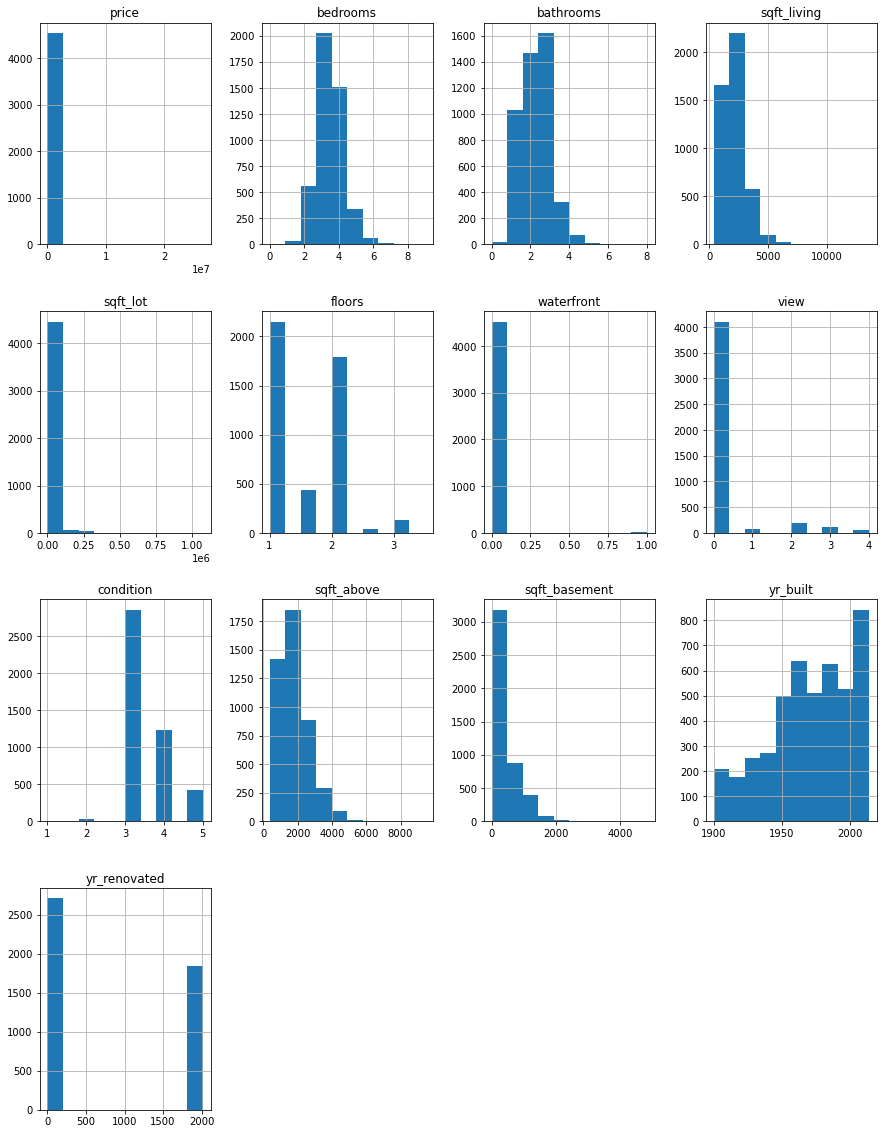

In [29]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
continous_variables.hist(ax = ax)

# 2.3 VISUALIZAING THE DEPENDENCY OF TARGET

<Figure size 1080x1440 with 0 Axes>

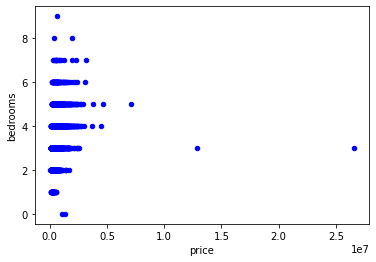

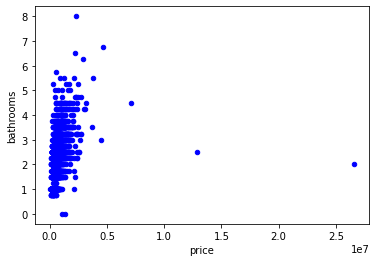

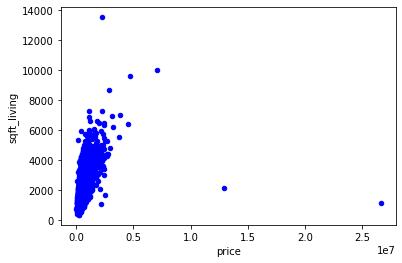

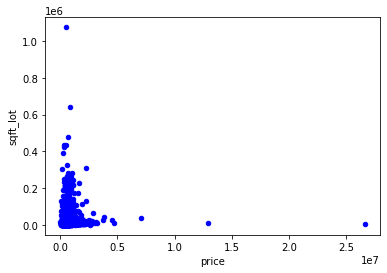

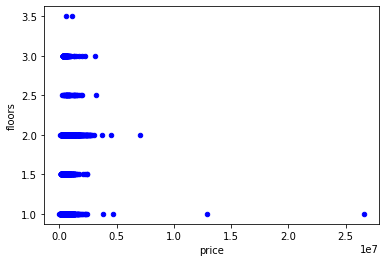

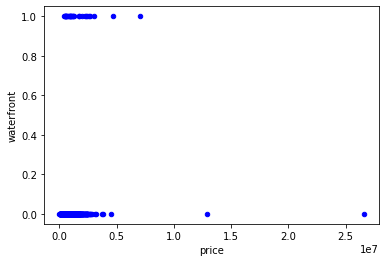

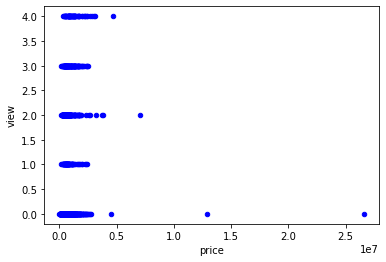

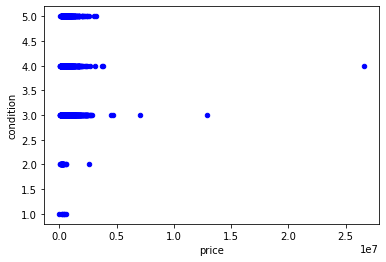

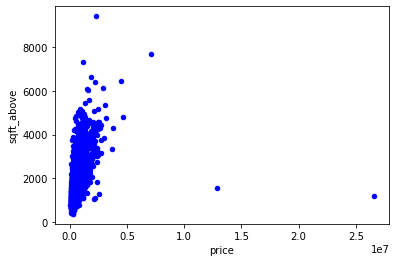

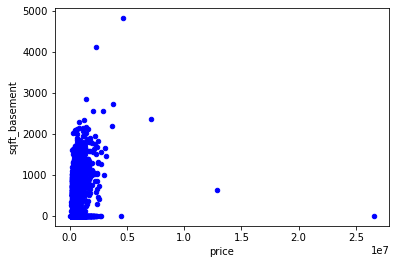

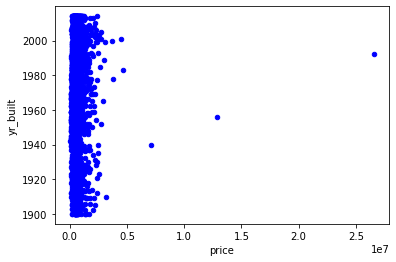

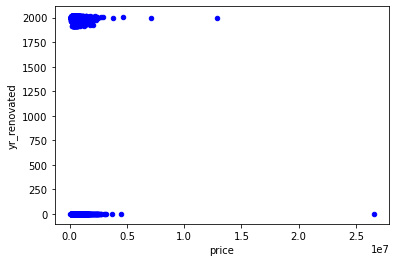

In [42]:
fig = plt.figure(figsize = (15,20))
continous_variables.plot(kind='scatter', x='price', y='bedrooms', color='blue')    
continous_variables.plot(kind='scatter', x='price', y='bathrooms', color='blue')    
continous_variables.plot(kind='scatter', x='price', y='sqft_living', color='blue')   
continous_variables.plot(kind='scatter', x='price', y='sqft_lot', color='blue')   
continous_variables.plot(kind='scatter', x='price', y= 'floors', color='blue') 
continous_variables.plot(kind='scatter', x='price', y='waterfront', color='blue')    
continous_variables.plot(kind='scatter', x='price', y='view', color='blue')    
continous_variables.plot(kind='scatter', x='price', y='condition', color='blue')   
continous_variables.plot(kind='scatter', x='price', y='sqft_above', color='blue')   
continous_variables.plot(kind='scatter', x='price', y= 'sqft_basement', color='blue') 
continous_variables.plot(kind='scatter', x='price', y='yr_built', color='blue')    
continous_variables.plot(kind='scatter', x='price', y='yr_renovated', color='blue')    

# 2.4 TRAIN_TEST SPLIT

In [14]:
## train_test split
## x = Two Dimensional Array (Input)
## y = one dimensional Array 
X = data
y = data['price']

In [15]:
## lABEL ENDCODING THE PRICE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
## TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
## SPLIT FOR VALIDATION
X_train, X_val, y_train, y_val =  train_test_split(X, y)

In [18]:
## PASSING THROUGH STANDARD SCALER

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.5926620172112976

In [19]:
X_train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1839,270000.0,3.0,2.25,2080,4252,1.5,0,0,3,1550,530,2003,0
2048,680000.0,3.0,2.25,2270,23900,1.0,0,0,3,1820,450,1975,0
744,215000.0,3.0,1.00,1160,10384,1.0,0,0,4,1160,0,1969,0
686,740000.0,4.0,2.50,3430,10157,2.0,0,0,3,3430,0,2000,0
1563,405000.0,5.0,1.75,1880,10000,1.0,0,0,3,960,920,1963,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,440000.0,3.0,1.50,1270,1443,3.0,0,0,3,1270,0,2007,0
3264,210000.0,2.0,1.00,970,5500,1.0,0,0,3,970,0,1956,2001
1653,538888.0,5.0,2.75,2080,13189,2.0,0,0,3,2080,0,1987,2000
2607,1920000.0,4.0,2.50,3070,34412,1.0,0,3,4,2070,1000,1950,1983


In [20]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [21]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [22]:
## COLUMN TRANSFORM to encode categorical data

from sklearn.pipeline import Pipeline
numeric_features = ['bedrooms']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['price', 'sqft_lot','waterfront', 'view','yr_renovated']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [23]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['bedrooms']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['price', 'sqft_lot', 'waterfront', 'view',
                                  'yr_renovated'])])

In [24]:
## Making pipeline

from sklearn.pipeline import make_pipeline


categorical = data.dtypes == object

preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))

In [25]:
preprocess

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 price            True
bedrooms         True
bathrooms        True
sqft_living      True
sqft_lot         True
floors           True
waterfront       True
view             True
condition        True
sqft_above       True
sqft_basement    True
yr_built         True
yr_renovated     True
dtype: bool),
                                ('onehotencoder', OneHotEncoder(),
                                 price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
dtype: bool)])

In [26]:
## Cros_validation score

from sklearn.pipeline import make_pipeline
model_pipeline_Logreg = make_pipeline(preprocess,  LogisticRegression())
model_pipeline_Logreg .fit(X_train, y_train)

score_model_pipeline_Logreg = cross_val_score(model_pipeline_Logreg , X_val, y_val, cv = 5, scoring = 'accuracy')

print('mean score_model_pipeline_knn: {:.3f}'.format(np.mean(score_model_pipeline_Logreg)))

C:\Users\tamim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tamim\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\tamim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

mean score_model_pipeline_knn: 0.013


C:\Users\tamim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2.5 FINE TUNING THE PARAMETERS

In [27]:
## Fine tuning the parameters with Lasso

# Pay attention to the name of the second step, i. e. 'model'
pipeline = Pipeline(steps=[
     ('preprocess', preprocess),
     ('model', Lasso())
])

# Define the parameter grid to be used in GridSearch
param_grid = {'model__alpha': np.arange(1, 30, 2)}

search = GridSearchCV(pipeline, param_grid)
search.fit(X_val, y_val)
search.best_score_

0.7368886613499173

In [28]:
## Fine tuning the parameters with Ridge

# Pay attention to the name of the second step, i. e. 'model'
pipeline = Pipeline(steps=[
     ('preprocess', preprocess),
     ('model', Ridge())
])

# Define the parameter grid to be used in GridSearch
param_grid = {'model__alpha': np.arange(1, 30, 2)}

search = GridSearchCV(pipeline, param_grid)
search.fit(X_val, y_val)
search.best_score_

0.7372048648517083